# Challenge 2

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)  


## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [2]:
fitbit=pd.read_csv('Fitbit2.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.000,172,34,18,1094,405,47,31,457,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
6,2015-05-14,2687,5614,4.17,2,782.000,216,13,1,9830,381,28,12,415,2.591117,Thursday,3.0,1,6.350000,91.807229,6.750000,88.621444,May,5
7,2015-05-15,2793,8169,6.07,14,801.000,218,8,7,1092,269,34,16,306,3.771722,Friday,4.0,1,4.483333,87.908497,6.350000,91.807229,May,5
8,2015-05-16,4061,19971,14.84,18,532.000,247,101,118,27,452,26,18,507,9.221146,Saturday,5.0,0,7.533333,89.151874,4.483333,87.908497,May,5
9,2015-05-17,3349,852,6.33,12,606.000,186,46,73,1766,269,17,11,291,3.933278,Sunday,6.0,0,4.483333,92.439863,7.533333,89.151874,May,5


## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**
1. **Is Fitbitter more active on weekend or workdays?**

##### All plots must be in the same jupyter notebook cell.

Hints:

- Use `Months_encoded` and `Week_or Weekend` columns
- Use `matplolib.pyplot` object oriented API
- Set your size figure to `12,4`
- Explore `plt.sca`
- Explore `plt.xticks`
- Save your figures

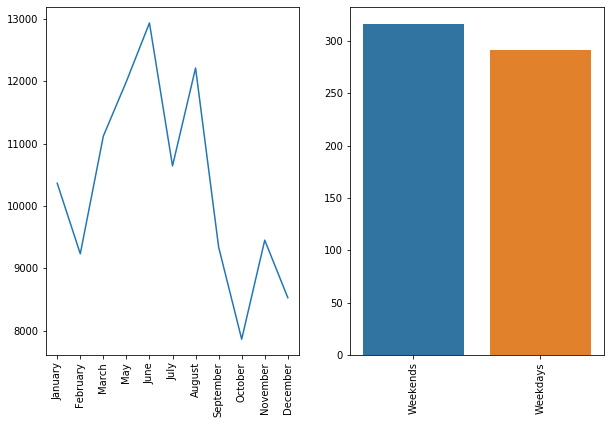

In [18]:
# PART 1: How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?
#make new df to show median steps per months
avg_steps = fitbit.groupby("Months").agg({"Steps":"median"})

#put months in order 
avg_steps = avg_steps.reindex(["January","February","March","May","June","July","August","September","October","November","December"])
avg_steps = avg_steps.reset_index()


#months plotted on x-axis, median steps per month plotted on y-axis
fig, axes = plt.subplots(1,2,figsize = [10,6.4])
axes[0].plot(avg_steps["Months"],avg_steps["Steps"])




# PART 2: Is Fitbitter more active on weekend or workdays?:
#makes new column in original dataframe with Total minutes active
fitbit["Total mins active"] = fitbit["Minutes Lightly Active"]+fitbit["Minutes Fairly Active"]+fitbit["Minutes Very Active"]

#average amount of activity per day of the week
daily_average = fitbit.groupby("Days").agg({"Total mins active":"mean"})

weekday_avg = daily_average.loc[["Monday","Tuesday","Wednesday","Thursday","Friday"]].mean()
weekend_avg = daily_average.loc[["Saturday","Sunday"]].mean()

#decided to try seaborn for second subplot
x_axis = ["Weekends","Weekdays"]
y_axis = [weekend_avg,weekday_avg]
axes[1] = sns.barplot(x=x_axis, y=y_axis)

#allows the 90 degree rotation of labels on each axes. xtick doesnt work on subplot axes without doing plt.sca on each one.
for axes in fig.axes:
    plt.sca(axes)
    plt.xticks(rotation=90)


## Coding Session II - 30 minutes

**Write a loop to plot 3 scatter plots of the following features:**

1. **`Minutes Lightly Active`  vs `Steps`**
1. **`Minutes Very Active` vs `Steps`**
1. **`Minutes Sedentary` vs `Steps`**

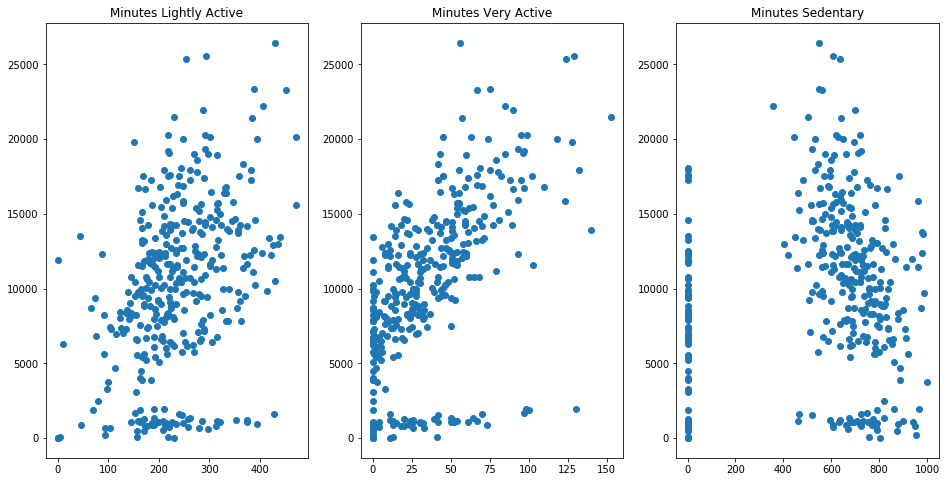

In [27]:
# Driver 2 enter codes here
x_axis = ["Minutes Lightly Active","Minutes Very Active","Minutes Sedentary"]
fig, axes = plt.subplots(1,3,figsize = [16,8])

for i in range(len(x_axis)):
    axes[i].scatter(fitbit[x_axis[i]],fitbit["Steps"])
    axes[i].set_title(x_axis[i])
